# Applying ML Model

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,  KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [32]:
train_data = pd.read_csv("../main_dataset/train_processed_data.csv")
train_data.shape

(874, 9)

In [33]:
x = train_data.drop(['Survived','PassengerId'],axis =1).values
y = train_data['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [34]:
from sklearn import metrics
def model_compare(model_name,model,y_test,y_pred,y_score, roc_auc = None):
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : roc_auc
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model_name] 
    return df_metrics

## DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model_dt = DecisionTreeClassifier(random_state=303)
np.random.seed(303)
# start = time.time()
param_dist = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf':[100,200,70, 30],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30}


In [36]:
model_dt = DecisionTreeClassifier(random_state=303,
                                  max_depth=4, 
                                  criterion = 'gini', 
                                  min_samples_leaf=30 )
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8140200286123033
Testing score:  0.7885714285714286


In [37]:
y_pred = model_dt.predict(x_test)
# Model Accuracy
print (model_dt.score(x_test, y_test))

0.7885714285714286


In [38]:
y_pred = model_dt.predict(x_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_dt, tpr_dt)
y_score = accuracy_score(y_test, y_pred)
metrix_dt = model_compare("Decision Tree",model_dt, y_test, y_pred, y_score, roc_auc  )
metrix_dt

,Decision Tree
Accuracy,0.788571
Precision,0.902439
Recall,0.528571
F1 Score,0.666667
ROC AUC,0.745238


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_rf = RandomForestClassifier(random_state=303)

In [12]:
param_dist = {'max_depth': [3,4,5,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [41]:
model_rf.set_params(criterion    = 'gini',
                    max_features = 'auto', 
                    max_depth    = 8,
                    bootstrap    = True
                   )

RandomForestClassifier(max_depth=8, random_state=303)

In [107]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 1000
max_estimators = 1500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

oob_series = pd.Series(error_rate)

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

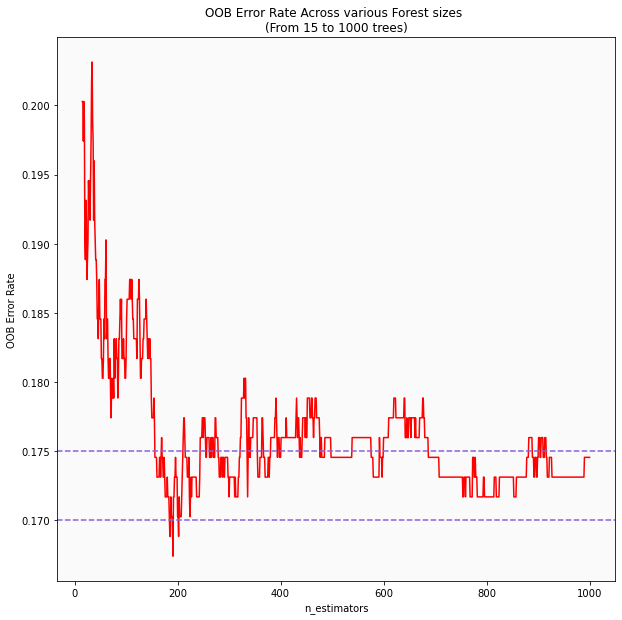

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.175, color='#875FDB',linestyle='--')
plt.axhline(0.170, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 1000 to 1500 trees)')

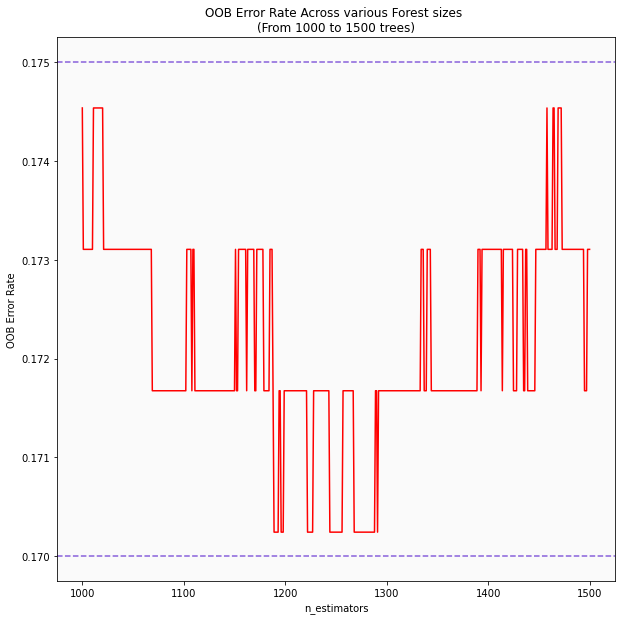

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.175, color='#875FDB',linestyle='--')
plt.axhline(0.170, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 1000 to 1500 trees)')

In [42]:
model_rf.set_params(n_estimators=750,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, n_estimators=750, random_state=303)

In [43]:
model_rf.fit(x_train, y_train)
prediction_test = model_rf.predict(x_test)
y_score= metrics.accuracy_score(y_test, prediction_test)
y_pred= model_rf.predict(x_test)
#########################################################
y_pred = model_rf.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_dt, tpr_dt)
#########################################################
metrix_rf = model_compare("Random Forest",model_rf, y_test, prediction_test, y_score , roc_auc_rf )
metrix_rf

,Random Forest
Accuracy,0.840000
Precision,0.888889
Recall,0.685714
F1 Score,0.774194
ROC AUC,0.856190


## Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model_nb = MultinomialNB().fit(x_train, y_train)
prediction_test = model_nb.predict(x_test)
y_score= metrics.accuracy_score(y_test, prediction_test)
y_pred= model_nb.predict(x_test)
y_pred = model_nb.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_dt, tpr_dt)
metrix_nb = model_compare("Naive Bayes",model_nb, y_test, prediction_test, y_score , roc_auc_rf )
metrix_nb

,Naive Bayes
Accuracy,0.697143
Precision,0.673469
Recall,0.471429
F1 Score,0.554622
ROC AUC,0.760884


## SVM

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x1 = scaler.transform(x)

In [47]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y,test_size =0.2, random_state=303)

In [48]:
from sklearn.svm import SVC

In [127]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
model_svc= SVC()
model_svm = GridSearchCV(model_svc, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

0.7153209109730848
{'C': 0.9, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}


In [49]:
model_svc = SVC(kernel='poly',gamma=0.05, degree=3, C=0.9 )
model_svc.fit(x1_train,y1_train)
y_pred=model_svc.predict(x1_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y1_test,y_pred))
y_pred = model_svc.predict(x1_test)
y_score = metrics.accuracy_score(y1_test, y_pred)
#########################################################
# y_pred = model_svm.predict_proba(x_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_svm = auc(fpr_dt, tpr_dt)
#########################################################
metrix_svm = model_compare("SVM poly", model_svc, y_test, y_pred, y_score, roc_auc_svm )
metrix_svm

Accuracy Score:
0.7028571428571428


,SVM poly
Accuracy,0.702857
Precision,0.950000
Recall,0.271429
F1 Score,0.422222
ROC AUC,0.630952


### AdaBoost 

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [51]:
model_ada = AdaBoostClassifier()

In [ ]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 750, 1200]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_ada, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
print('Best Parameters using grid search: \n', grid_result.best_params_)

In [52]:
model_ada.set_params(learning_rate    = 0.01,
                     n_estimators = 750
                    )

AdaBoostClassifier(learning_rate=0.01, n_estimators=750)

In [53]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=750)

In [54]:
y_pred=model_ada.predict(x_test)
y_score = metrics.accuracy_score(y_test, y_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_ada = auc(fpr_dt, tpr_dt)
metrix_ada = model_compare("Ada Boost", model_ada, y_test, y_pred, y_score, roc_auc_ada )
metrix_ada

,Ada Boost
Accuracy,0.805714
Precision,0.800000
Recall,0.685714
F1 Score,0.738462
ROC AUC,0.785714


### GradientBoosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
parameters = {
#     "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": [30,45,60,80],
    "min_samples_leaf": [15,30,45,60],
    "max_depth":[3,4,5,8],
    "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100, 500, 750, 1200]
    }
grid_search = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=1)
grid_result = grid_search.fit(x_train, y_train)
print('Best Parameters using grid search: \n', grid_result.best_params_)

In [35]:
grid_search.cv_results_

{'mean_fit_time': array([0.01867437, 0.08192909, 0.12340498, ..., 0.31265199, 0.45651019,
        0.70788205]),
 'std_fit_time': array([0.00092268, 0.01090753, 0.01134539, ..., 0.01843655, 0.00168264,
        0.00875247]),
 'mean_score_time': array([0.05819046, 0.        , 0.01563621, ..., 0.00698149, 0.00798285,
        0.01149607]),
 'std_score_time': array([4.12262678e-02, 0.00000000e+00, 4.29153442e-05, ...,
        1.19209290e-07, 1.00409985e-03, 4.97579575e-04]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, ..., 0.2, 0.2, 0.2],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, ..., 8, 8, 8],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['log2', 'log2', 'log2', ..., 'sqrt', 'sqrt', 'sqrt'],
              mask=[False, False, False, ...,

In [38]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [39]:
means = grid_search.cv_results_['mean_score_time']
stds = grid_search.cv_results_['std_score_time']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.058190 (0.041226) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 10}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 50}
0.015636 (0.000043) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 100}
0.005260 (0.005260) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 500}
0.016326 (0.000638) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 750}
0.024871 (0.008012) with: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 1200}
0.009610 (0.008582) with: {'learning_rate

0.007998 (0.000001) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 10}
0.003986 (0.003986) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 50}
0.008013 (0.003574) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 100}
0.009132 (0.001082) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 500}
0.010142 (0.001012) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 750}
0.018828 (0.002833) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 60, 'min_samples_split': 60, 'n_estimators': 1200}
0.004588 (0.004588) with: {'learning_rate

0.004489 (0.001496) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 10}
0.008978 (0.002993) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 50}
0.002991 (0.000000) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 100}
0.005998 (0.000012) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 500}
0.009489 (0.000486) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 750}
0.011967 (0.000002) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 45, 'min_samples_split': 30, 'n_estimators': 1200}
0.003491 (0.000499) with: {'learning_rate': 0.1

0.003004 (0.000012) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 10}
0.003004 (0.000011) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 50}
0.002992 (0.000001) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 100}
0.007977 (0.000998) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 500}
0.009999 (0.000001) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 750}
0.014487 (0.000494) with: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 1200}
0.001995 (0.000000) with: {'learning_rate': 0.2

In [56]:
model_GB = GradientBoostingClassifier(
                                        learning_rate = 0.01,
                                        max_depth = 8,
                                        max_features = 'auto',
                                        min_samples_leaf = 30,
                                        min_samples_split = 40,
                                        n_estimators = 750
                                     )
model_GB.fit(x_train, y_train)
y_pred=model_GB.predict(x_test)
y_score = metrics.accuracy_score(y_test, y_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_GB = auc(fpr_dt, tpr_dt)
metrix_GB = model_compare("GB", model_GB, y_test, y_pred, y_score, roc_auc_GB )
metrix_GB

,GB
Accuracy,0.874286
Precision,0.913793
Recall,0.757143
F1 Score,0.828125
ROC AUC,0.854762


### XGBoost 

In [57]:
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb

In [29]:
scaler = StandardScaler()
scaler.fit(x)
x1 = scaler.transform(x)

In [58]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y,test_size =0.2, random_state=303)

In [ ]:
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200,500,750,1200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10, random_state=42)
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  xgb.XGBClassifier(),
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=1
)
gridsearch_result = grid.fit(x_train, y_train)

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1176 candidates, totalling 11760 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 23.5min


In [64]:
xgboost_best = xgb.XGBClassifier(n_jobs = 1
                                 ,objective = 'binary:logistic'
                                 ,colsample_bytree = 1.0
                                  ,gamma = 0.1
                                  ,learning_rate = 0.1
                                  ,max_depth = 5
                                  ,min_child_weight = 5
                                  ,n_estimators = 750
                                  ,subsample = 1.0)

In [65]:
xgboost_best.fit(x1_train,y_train)

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_pred = xgboost_best.predict(x1_test)
y_score = metrics.accuracy_score(y_test, y_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_xgboost = auc(fpr_dt, tpr_dt)
metrix_xgboost = model_compare("Xg Boost", model_ada, y_test, y_pred, y_score, roc_auc_xgboost )
metrix_xgboost

,Xg Boost
Accuracy,0.851429
Precision,0.892857
Recall,0.714286
F1 Score,0.793651
ROC AUC,0.828571


### Voting Classifier (RandomForest + XGBoost + SVM)

In [67]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [73]:
model_voting = VotingClassifier(
    [
        ("rf_model", RandomForestClassifier(
                                            criterion    = 'gini',
                                            max_features = 'auto', 
                                            max_depth    = 8,
                                            bootstrap    = False,
#                                             n_estimators=750,
                                            warm_start=False, 
                                            oob_score=False
                                            )
        ),
        ("xgb_model", XGBClassifier(eval_metric="logloss", random_state = 18)),
        ("gb_model", GradientBoostingClassifier(
                                        learning_rate = 0.01,
                                        max_depth = 8,
                                        max_features = 'auto',
                                        min_samples_leaf = 30,
                                        min_samples_split = 40,
#                                         n_estimators = 750
                                     )
        ),
        ("svm_model", SVC(C=1000, gamma=0.01))
    ]
)

In [ ]:
model_voting.fit(x_train, y_train)
y_pred=model_voting.predict(x_test)
y_score = metrics.accuracy_score(y_test, y_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_voting = auc(fpr_dt, tpr_dt)
metrix_voting = model_compare("Voting Classifier (RandomForest + XGBoost + SVM)", model_voting, y_test, y_pred, y_score, roc_auc_voting )
metrix_voting

In [67]:
metrics_bn_new = pd.concat([metrix_dt, metrix_rf, metrix_nb, metrix_svm, metrix_ada, metrix_GB, metrix_xgboost], axis=1)
metrics_bn_new

,Decision Tree,Random Forest,Naive Bayes,SVM poly,Ada Boost,GB,Xg Boost
Accuracy,0.788571,0.840000,0.697143,0.702857,0.805714,0.874286,0.851429
Precision,0.902439,0.888889,0.673469,0.950000,0.800000,0.913793,0.892857
Recall,0.528571,0.685714,0.471429,0.271429,0.685714,0.757143,0.714286
F1 Score,0.666667,0.774194,0.554622,0.422222,0.738462,0.828125,0.793651
ROC AUC,0.745238,0.856190,0.760884,0.630952,0.785714,0.854762,0.828571


In [70]:
## By Looking at this all this model Random Forest is Giving you the Best Out 
## with respect to the ROC AUC CURVE , Recall, ..etc

In [68]:
final_model = GradientBoostingClassifier(
                                        learning_rate = 0.01,
                                        max_depth = 8,
                                        max_features = 'auto',
                                        min_samples_leaf = 30,
                                        min_samples_split = 40,
                                        n_estimators = 750
                                     )

In [69]:
x = train_data.drop(['Survived','PassengerId'],axis =1).values
y = train_data['Survived'].values

In [70]:
final_model.fit(x, y)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features='auto',
                           min_samples_leaf=30, min_samples_split=40,
                           n_estimators=750)

In [71]:
test_data = pd.read_csv("../main_dataset/test_processed_data.csv")

In [72]:
x_test = test_data.drop(['PassengerId'],axis =1).values

In [73]:
prediction_test = model_rf.predict(x_test)

In [74]:
prediction_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
test_data.insert(1,column="Survived",value=prediction_test)

In [76]:
test_data.drop([feature for feature in test_data.columns if feature not in ['PassengerId','Survived'] ],axis=1,inplace= True)

In [77]:
test_data.to_csv('../main_dataset/Test_predictions.csv',index=False)

In [78]:
test_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
